In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
dataframe = dataframe[dataframe['rate'].notnull()]  
dataframe = dataframe[~dataframe['rate'].isin(['NEW', '-'])] 

def handleRate(value):
    return float(str(value).split('/')[0]) 
dataframe['rate'] = dataframe['rate'].apply(handleRate)


In [4]:
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '')
dataframe['approx_cost(for two people)'] = pd.to_numeric(dataframe['approx_cost(for two people)'], errors='coerce')


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


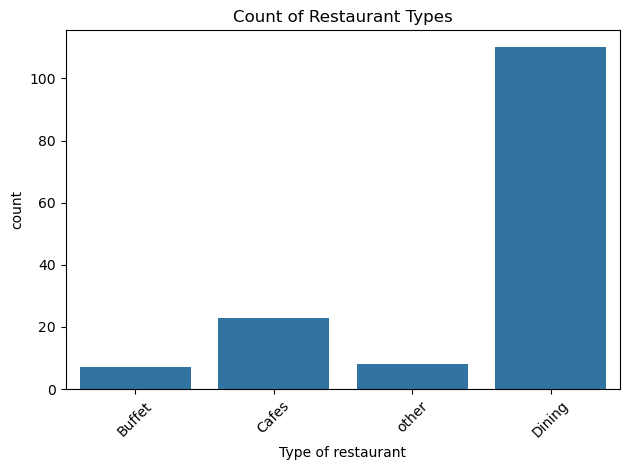

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xticks(rotation=45)
plt.xlabel("Type of restaurant")
plt.title("Count of Restaurant Types")
plt.tight_layout()
plt.show()

<Axes: xlabel='listed_in(type)'>

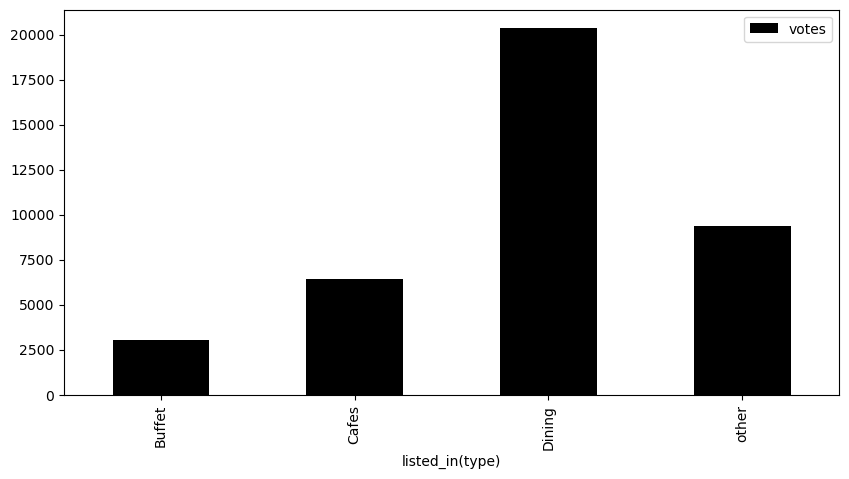

In [9]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
result.plot(kind='bar', figsize=(10,5), color='black')


In [10]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']


<Axes: xlabel='online_order', ylabel='count'>

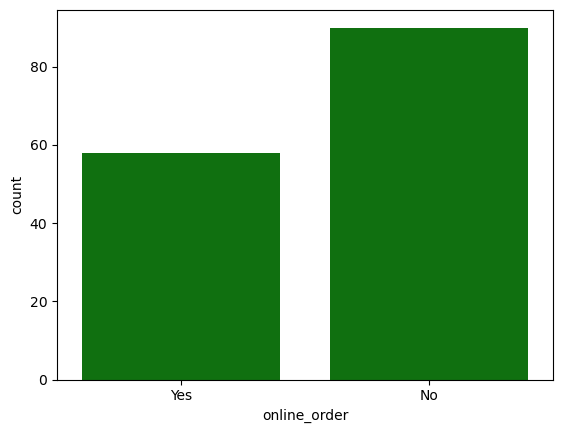

In [13]:
sns.countplot(x=dataframe['online_order'] ,color="green")

(array([10., 30., 44., 51., 13.]),
 array([2.6, 3. , 3.4, 3.8, 4.2, 4.6]),
 <BarContainer object of 5 artists>)

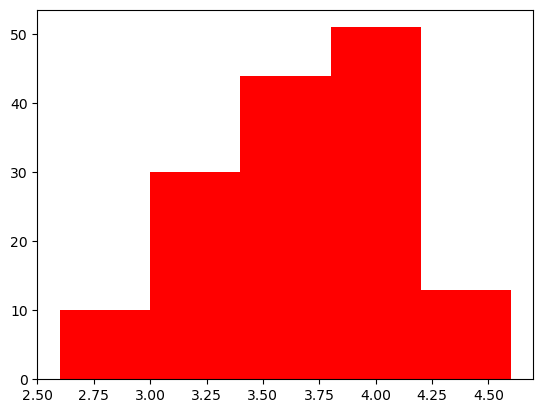

In [15]:
plt.hist(dataframe['rate'], bins=5,color="red")

<Axes: xlabel='approx_cost(for two people)', ylabel='Count'>

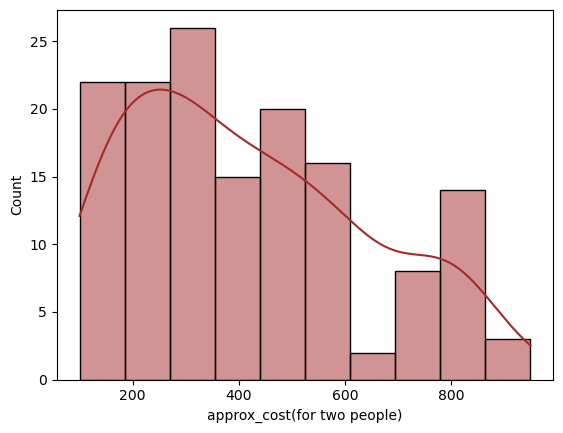

In [22]:
sns.histplot(dataframe['approx_cost(for two people)'],color="brown", bins=10, kde=True)


<Axes: xlabel='online_order', ylabel='rate'>

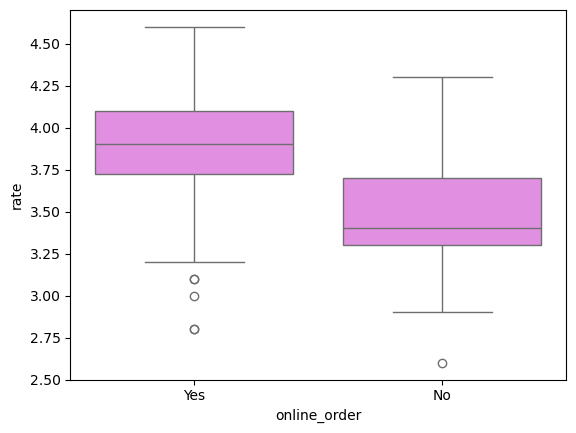

In [24]:
sns.boxplot(x='online_order', y='rate', data=dataframe,color="violet")


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

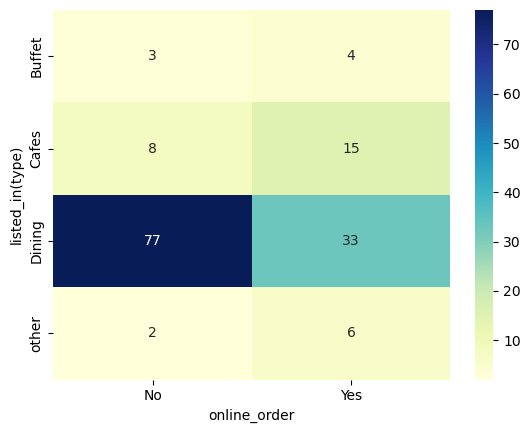

In [30]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap='YlGnBu', fmt='d')
